http://www.dafit.me/question/?q=YToxOntzOjEyOiJrZXl3b3JkX3R5cGUiO3M6MzoiYWxsIjt9&bmode=view&idx=2682894&t=board
https://drive.google.com/drive/folders/1RhW4neNzjil7UuKWpv_kOtIjCxvRusQS  
https://www.openml.org/d/37

In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Load

In [3]:
path = "/mnt/3CE35B99003D727B/input/dafit/pf906/"

In [5]:
df = pd.read_csv(os.path.join(path + 'dataset_37_diabetes.csv'))

# Data

In [6]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [21]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df['class'] = lb_make.fit_transform(df['class'])

In [23]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [25]:
print("is null->",pd.isnull(df).sum())
print("is Nan->", pd.isna(df).sum())

is null-> preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64
is Nan-> preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [30]:
import pandas_profiling
df.profile_report()

# column analysis

전체적인 데이터 분포는 negative가 65.1%이고  positive가 34.9%정도된다

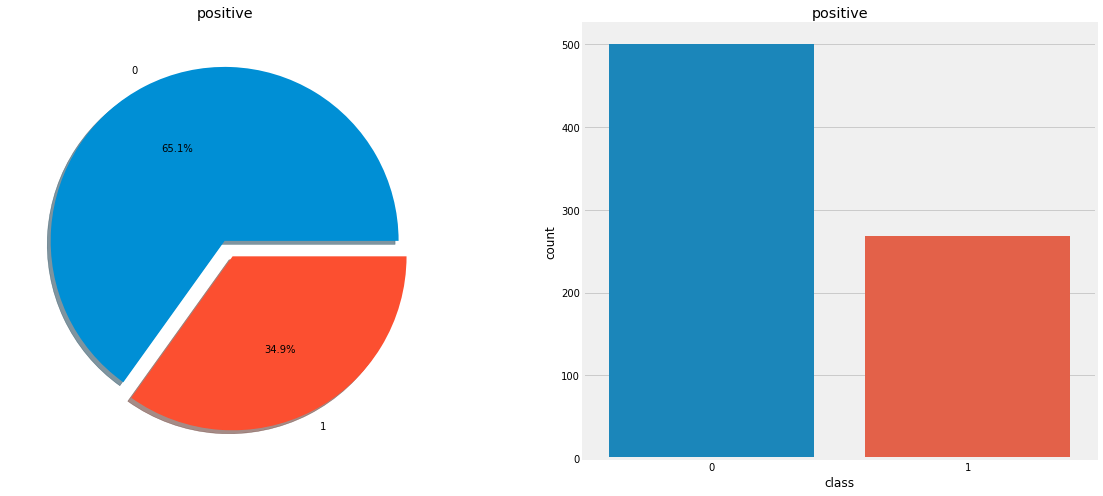

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('positive')
ax[0].set_ylabel('')
sns.countplot('class',data=df,ax=ax[1])
ax[1].set_title('positive')
plt.show()

예상대로 나이가 적을수록 negative일 확률이 높다.

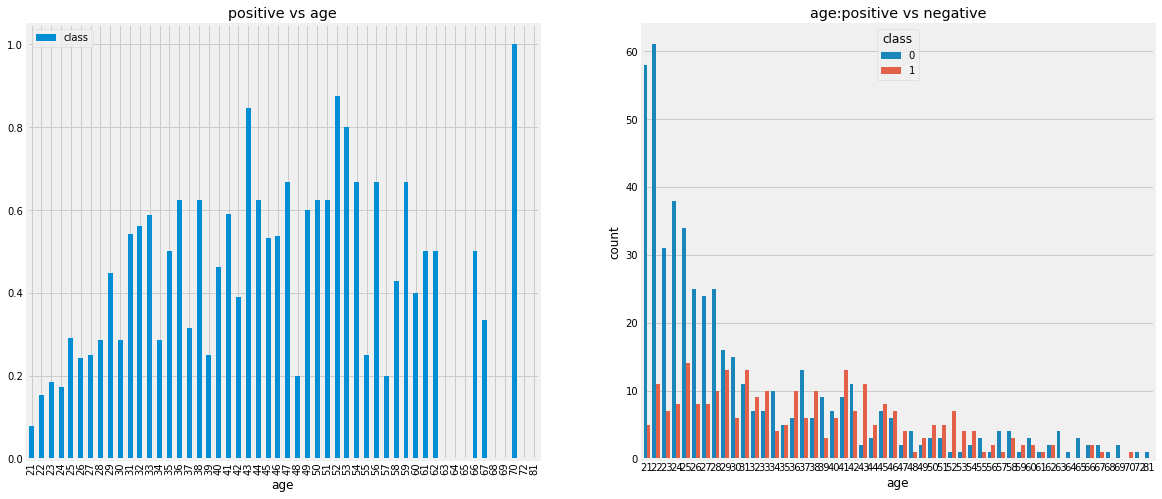

In [28]:
# age
#sex
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['age','class']].groupby(['age']).mean().plot.bar(ax=ax[0])
ax[0].set_title('positive vs age')
sns.countplot('age',hue='class',data=df,ax=ax[1])
ax[1].set_title('age:positive vs negative')
plt.show()

# split

In [40]:
df.shape

(768, 9)

In [41]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [63]:
print(type(X),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


# BaseLine train result
아무런 정제도 거치지 않은 결과값: 0.7467

In [50]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [52]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [60]:
# Random Forest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

accuracy_score(y_test,Y_prediction)

0.7467532467532467